# K Nearest Neighbors Project 

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [46]:
df=pd.read_csv('KNN_Project_Data')

In [47]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


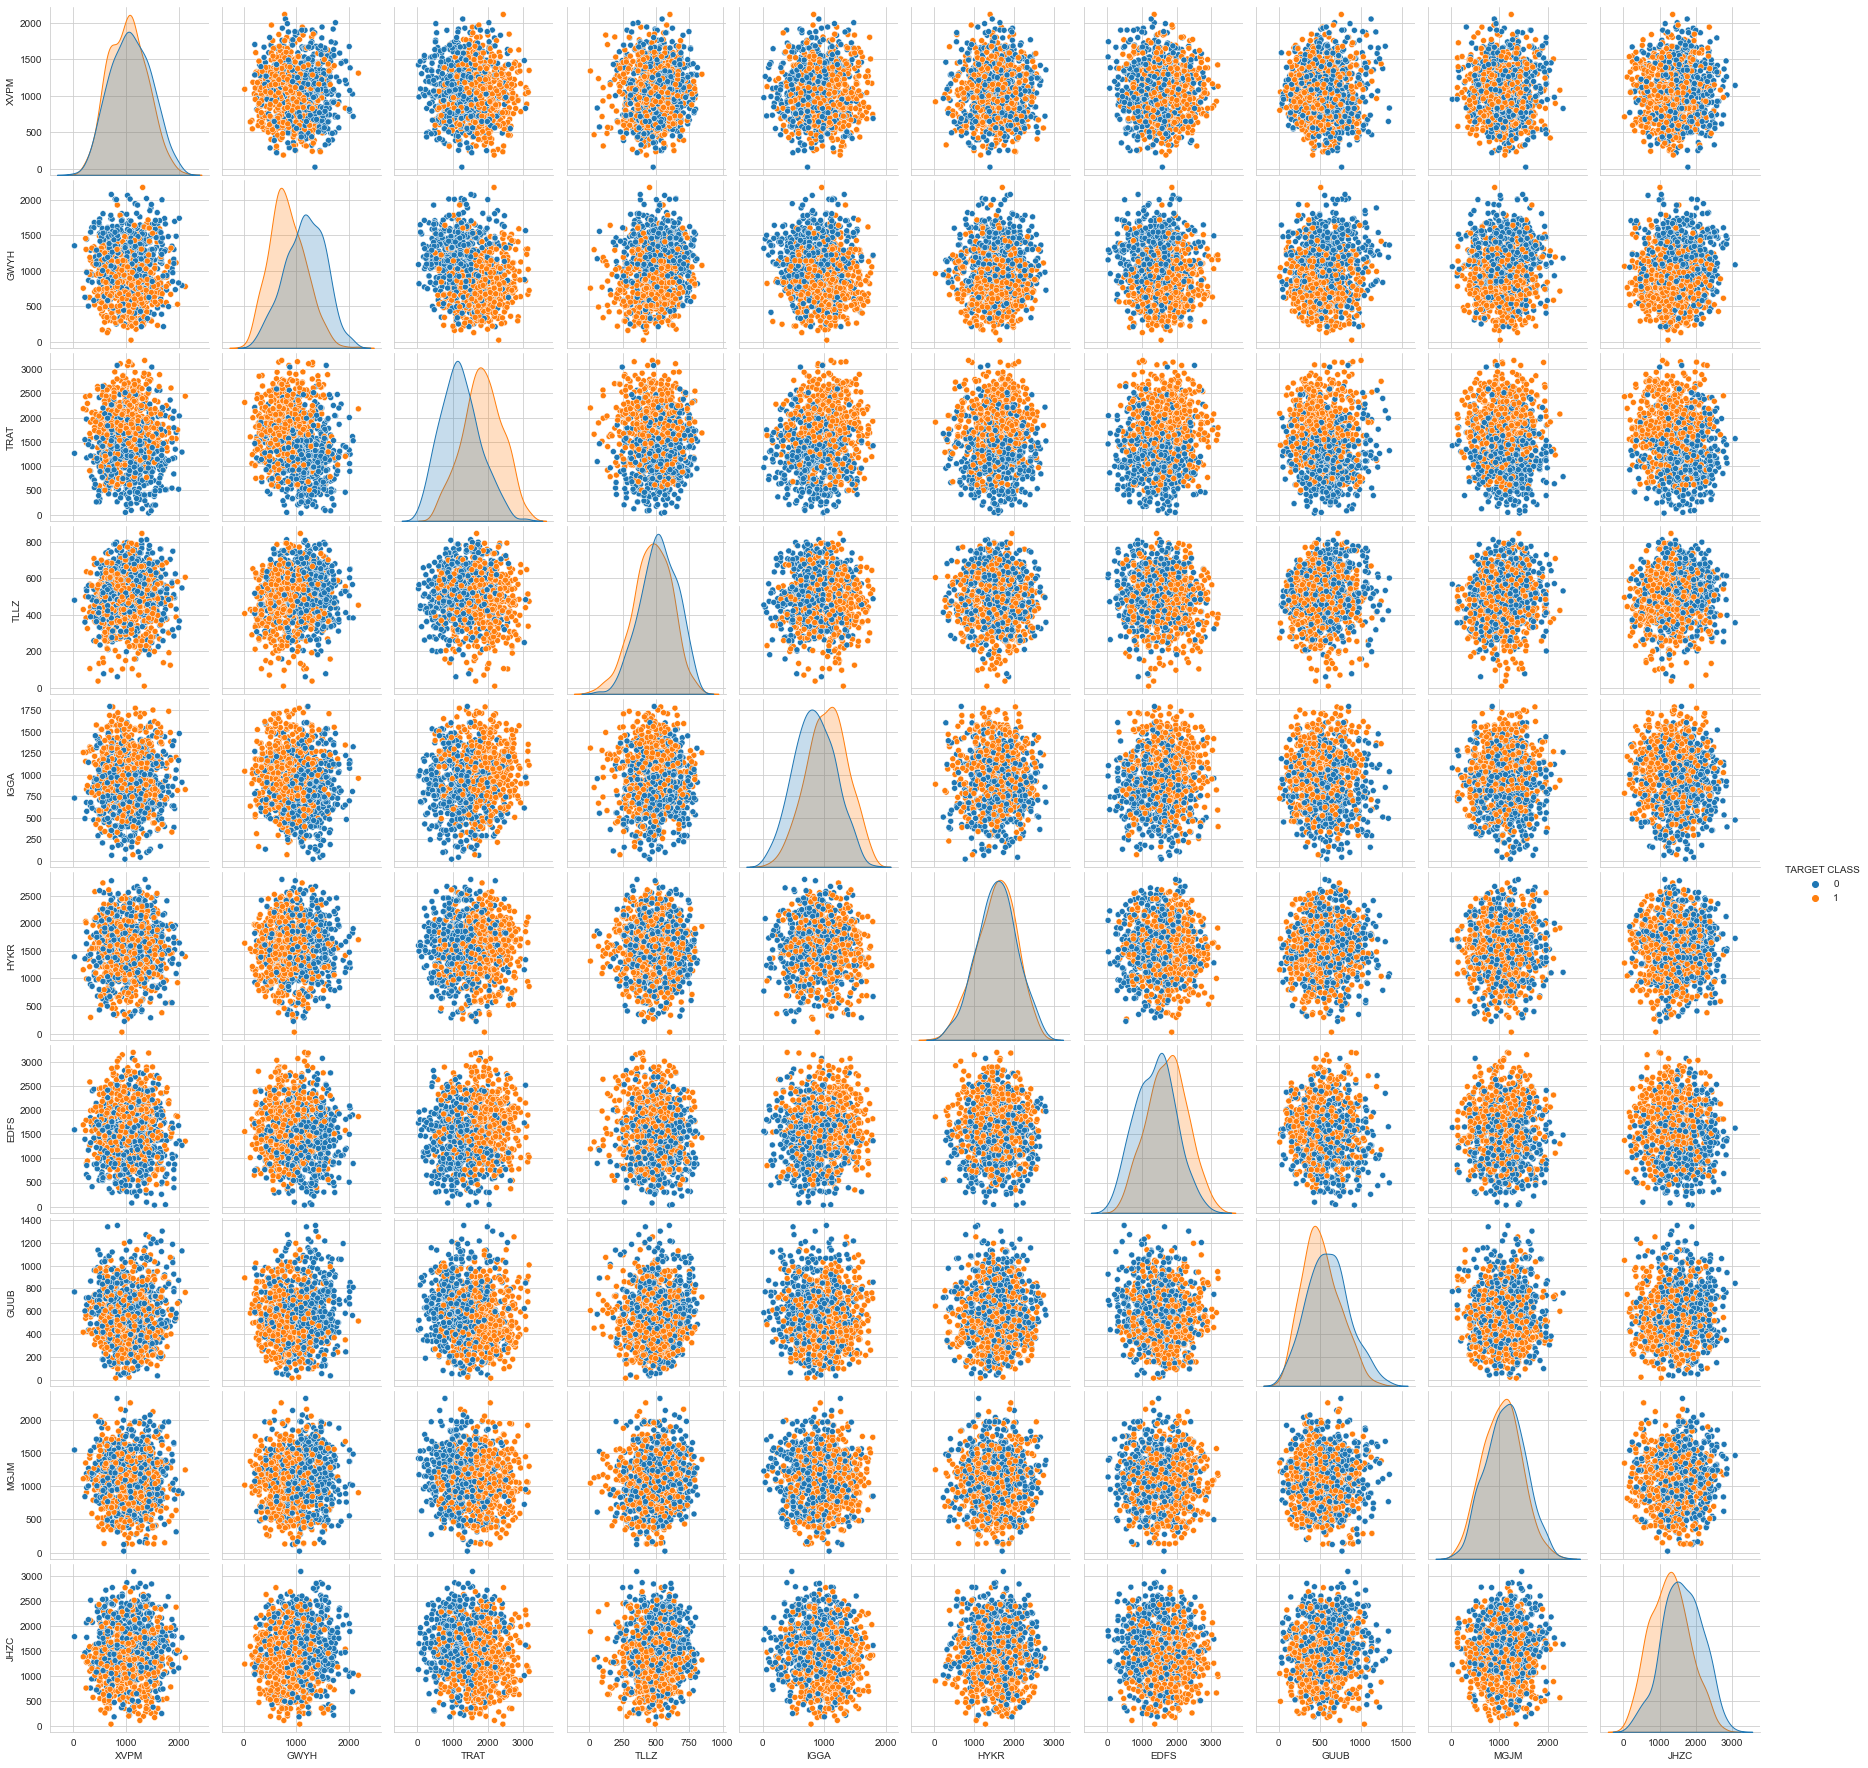

In [48]:
sns.pairplot(data=df,hue='TARGET CLASS')

# Standardize the Variables

In [1]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()

In [51]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [52]:
scaler.transform(df.drop('TARGET CLASS',axis=1))

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [53]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))


In [54]:
df_scaled=pd.DataFrame(scaled_features,columns=(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']))
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [55]:
df.columns
X=df_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']]
y=df['TARGET CLASS']

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# Build KNN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier 

In [58]:
KNN=KNeighborsClassifier(n_neighbors=1)

In [59]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations


In [60]:
predictions=KNN.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
confusion_matrix(y_test,predictions)

array([[113,  37],
       [ 40, 110]], dtype=int64)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       150
           1       0.75      0.76      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Choosing a K Value

In [23]:
error_rate=[]

for k in range(1,40):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    predictions=KNN.predict(X_test)
    error_rate.append(np.mean(predictions!=y_test))
    

Text(0.5, 1.0, 'Error Rates vs K values')

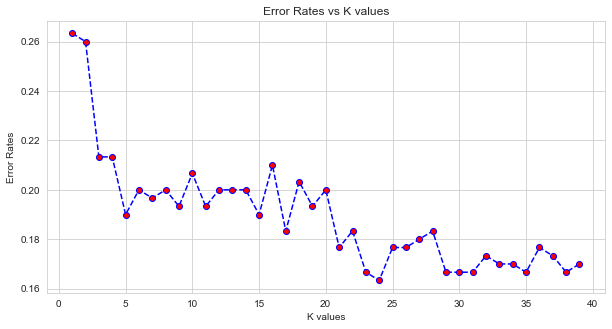

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,marker='o',color='blue',linestyle='--',markerfacecolor='red')
plt.xlabel('K values')
plt.ylabel('Error Rates')
plt.title('Error Rates vs K values')

## Retrain with new K Value

In [25]:
KNN=KNeighborsClassifier(n_neighbors=30)
KNN.fit(X_train,y_train)
predictions=KNN.predict(X_test)
print('WITH K=30')
print()
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))
    

WITH K=30

[[122  32]
 [ 18 128]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       154
           1       0.80      0.88      0.84       146

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [27]:
KNN=KNeighborsClassifier(n_neighbors=36)
KNN.fit(X_train,y_train)
predictions=KNN.predict(X_test)
print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=36


[[122  32]
 [ 21 125]]


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       154
           1       0.80      0.86      0.83       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

